In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv('CC GENERAL.csv')  # Adjust the file path if necessary

# Display the first few rows
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [3]:
# Drop columns that are not useful for clustering
df = df.drop(columns=['CUST_ID'])

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any (e.g., impute with mean, median, etc.)
df = df.fillna(df.mean())  

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [4]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

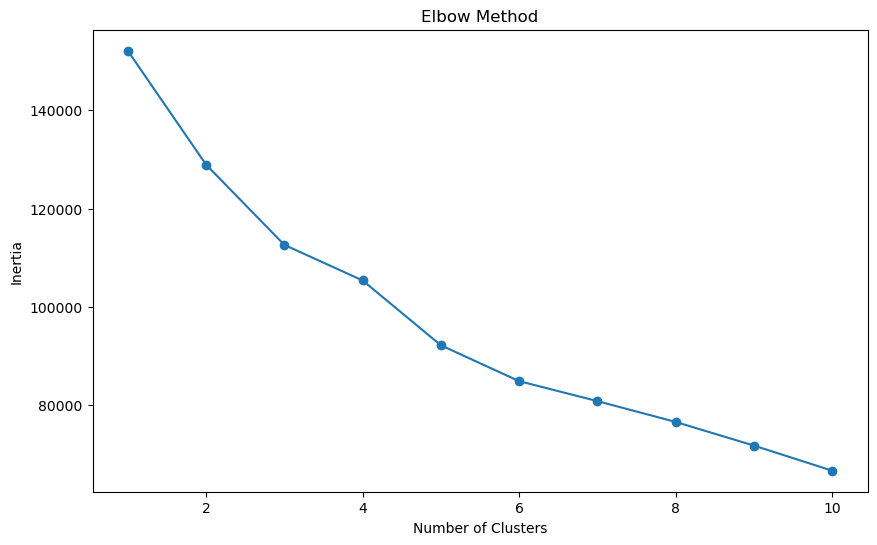

In [5]:
#Determine the Optimal Number of Clusters
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

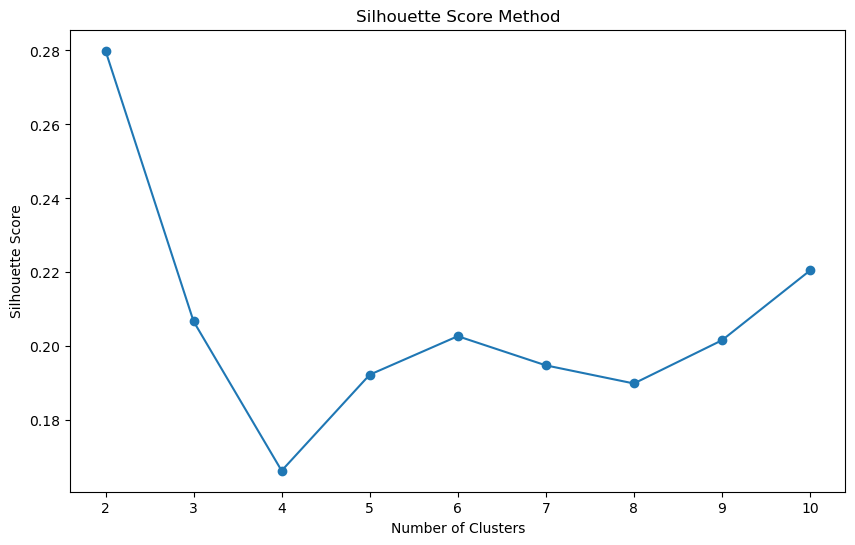

In [6]:
#Silhouette Score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [7]:
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

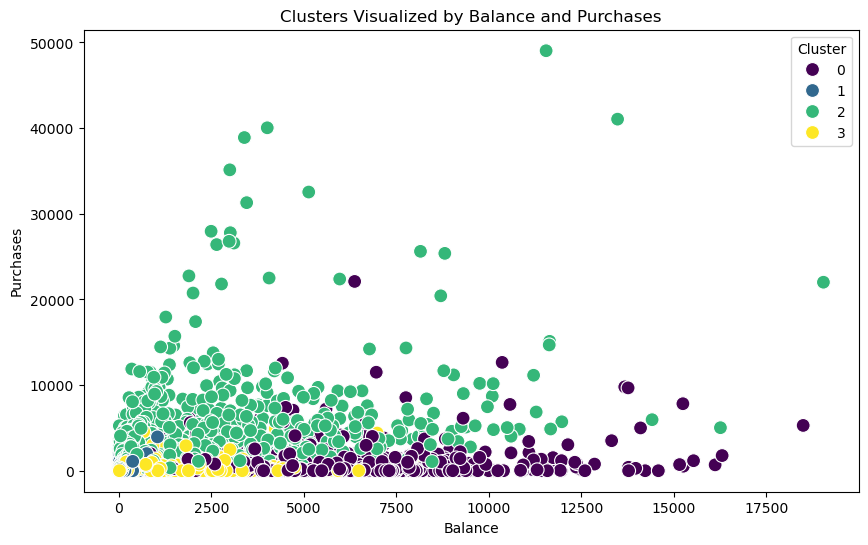

In [8]:
#Visualize using two features: 'BALANCE' and 'PURCHASES'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BALANCE'], y=df['PURCHASES'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Clusters Visualized by Balance and Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.legend(title='Cluster')
plt.show()

In [9]:
# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5023.958508           0.967107   721.184928        453.485000   
1         109.464707           0.412883   351.589913        191.487250   
2        1253.422099           0.974766  2181.418772       1241.370362   
3        1500.348531           0.966640   282.216074        209.226223   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    267.804742   5075.737329             0.329511   
1                    160.571811    299.684391             0.320703   
2                    940.311888    234.489319             0.928436   
3                     73.305481    789.088912             0.206247   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      